# Data Pre-processing
by: Kaike W. Reis

## Briefly overview

This notebook presents how was pre-processed original dataset from [Diagnosis of COVID-19 and its clinical spectrum](https://www.kaggle.com/einsteindata4u/covid19). The goal here is to improve reproducibility and compreheend how to treat very sparse datasets.

My goal here is to find a complete dataset to move with my studies, maximizing the number of rows.

## Pre-processing steps
- Missing Data Treatment
- Feature Engineering
- Dataset Creation

## Notebook Libraries

In [1]:
# Standard modules
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

# Missing Treatment
import missingno as msno

# Graphical modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Missing Data Treatment
## Importing data

In [2]:
# Importing raw dataset
dataset_raw = pd.read_excel('dataset.xlsx')

In [3]:
# Drop unused ID column
dataset_raw.drop('Patient ID', axis=1, inplace=True)

In [4]:
# Improve readability of columns
dataset_raw.columns = [col.lower().replace(' ','_') for col in dataset_raw.columns]

## Categorical to Numerical conversion

I performed categorical to numerical conversion and removed tests that were not tested on infected patients. This process was inspired inspired by [Jairo's](https://www.kaggle.com/jairofreitas/covid-19-influence-of-exams-in-recall-precision) notebook at the Kaggle Challenge. 

In [5]:
# Create mask
mask = {'positive': 1, 
        'negative': 0,
        'detected': 1, 
        'not_detected': 0,
        'not_done': np.NaN,
        'Não Realizado': np.NaN,
        'absent': 0, 
        'present': 1,
        'detected': 1, 
        'not_detected': 0,
        'normal': 1,
        'light_yellow': 1, 
        'yellow': 2, 
        'citrus_yellow': 3, 
        'orange': 4,
        'clear': 1, 
        'lightly_cloudy': 2, 
        'cloudy': 3, 
        'altered_coloring': 4,
        '<1000': 1000,
        'Ausentes': 0, 
        'Urato Amorfo --+': 1, 
        'Oxalato de Cálcio +++': 1,
        'Oxalato de Cálcio -++': 1, 
        'Urato Amorfo +++': 1}

# Apply mask
df = dataset_raw.replace(mask)

## Create a new column for Patient admission

In [6]:
# Create a new unique column based in patient admission
admissions = ['patient_addmited_to_regular_ward_(1=yes,_0=no)',
              'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
              'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)']

# Evaluate the number of possibilities for three targets in a single column
patient_addmited_possibilities = list()
for i in range(0, len(df)):
    possibility=str(int(df.loc[i,admissions[0]])) + str(int(df.loc[i,admissions[1]])) + str(int(df.loc[i,admissions[2]]))
    patient_addmited_possibilities.append(possibility)

# Print result
print(sorted(set(patient_addmited_possibilities)))

['000', '001', '010', '100']


I will create a new column related to patient admission called `patient_admission` where:

- Category 0 implies not addmited ('000')
- Category 1 implies regular ward ('100')
- Category 2 implies semi-intensitve unit ('010')
- Category 3 implies intensitve care unit ('001')

In [7]:
## Create the new column
df['patient_admission'] = patient_addmited_possibilities

## Change the new column to num values
for i in range(0, len(df)):
    if df.loc[i, 'patient_admission'] == '000':
        df.loc[i, 'patient_admission'] = 0
    elif df.loc[i, 'patient_admission'] == '100':
        df.loc[i, 'patient_admission'] = 1
    elif df.loc[i, 'patient_admission'] == '010':
        df.loc[i, 'patient_admission'] = 2
    elif df.loc[i, 'patient_admission'] == '001':
        df.loc[i, 'patient_admission'] = 3
        
# Drop residual cols
df.drop(admissions, axis=1, inplace=True)

## See class distribution
df['patient_admission'].value_counts()

0    5474
1      79
2      50
3      41
Name: patient_admission, dtype: int64

## (1) Remove Empty or Invariant columns in my dataset
- Empty column: as the name describe, they don't present any value
- Invariant column: column with only one class

In [8]:
# Visualize wannabe categorical cols
for col in df.columns:
    if len(df[col].unique()) < 5:
        print(col, df[col].unique())

sars-cov-2_exam_result [0 1]
respiratory_syncytial_virus [nan  0.  1.]
influenza_a [nan  0.  1.]
influenza_b [nan  0.  1.]
parainfluenza_1 [nan  0.  1.]
coronavirusnl63 [nan  0.  1.]
rhinovirus/enterovirus [nan  1.  0.]
mycoplasma_pneumoniae [nan]
coronavirus_hku1 [nan  0.  1.]
parainfluenza_3 [nan  0.  1.]
chlamydophila_pneumoniae [nan  0.  1.]
adenovirus [nan  0.  1.]
parainfluenza_4 [nan  0.  1.]
coronavirus229e [nan  0.  1.]
coronavirusoc43 [nan  0.  1.]
inf_a_h1n1_2009 [nan  0.  1.]
bordetella_pertussis [nan  0.  1.]
metapneumovirus [nan  0.  1.]
parainfluenza_2 [nan  0.]
influenza_b,_rapid_test [nan  0.  1.]
influenza_a,_rapid_test [nan  0.  1.]
strepto_a [nan  1.  0.]
fio2_(venous_blood_gas_analysis) [nan  0.]
promyelocytes [        nan -0.10206207  9.79795933]
myeloblasts [nan  0.]
urine_-_esterase [nan  0.]
urine_-_hemoglobin [nan  0.  1.]
urine_-_bile_pigments [nan  0.]
urine_-_ketone_bodies [nan  0.]
urine_-_nitrite [nan]
urine_-_urobilinogen [nan  1.]
urine_-_protein [nan  

Most of `urine` variables are invariant or empty. The columns:

`'mycoplasma_pneumoniae'
'd-dimer'
'partial_thromboplastin_time\xa0(ptt)\xa0'
'prothrombin_time_(pt),_activity'
'urine_-_sugar'
'urine_-_yeasts'
'urine_-_granular_cylinders'
'urine_-_hyaline_cylinders'
'myeloblasts'
'fio2_(venous_blood_gas_analysis)'
'urine_-_esterase','parainfluenza_2'
'urine_-_bile_pigments'
'urine_-_ketone_bodies'
'urine_-_protein'
'urine_-_urobilinogen'
'urine_-_nitrite'`

Should be remove

In [9]:
# Columns to Drop
cols_to_drop = ['mycoplasma_pneumoniae',
                'd-dimer',
                'partial_thromboplastin_time\xa0(ptt)\xa0',
                'prothrombin_time_(pt),_activity',
                'urine_-_sugar',
                'urine_-_yeasts',
                'urine_-_granular_cylinders',
                'urine_-_hyaline_cylinders',
                'myeloblasts',
                'fio2_(venous_blood_gas_analysis)',
                'urine_-_esterase','parainfluenza_2',
                'urine_-_bile_pigments',
                'urine_-_ketone_bodies',
                'urine_-_protein',
                'urine_-_urobilinogen',
                'urine_-_nitrite']
# Remove it
df.drop(cols_to_drop, axis=1, inplace=True)

## (2) Remove columns that presents only missing values for positive cases
This is a case of invariant column

In [10]:
def calculate_nan_pct(df):
    '''Function to calculate % of nan and number of missing values for each column'''
    nan_per_column = pd.DataFrame(df.isna().sum(), columns=['nanValues']).reset_index()
    
    for i in range(0,len(nan_per_column)):
        nan_per_column.loc[i, 'nanValuesPct'] = 100*round(nan_per_column.loc[i, 'nanValues']/len(df),3)
    
    return nan_per_column

In [11]:
# Dataframe for only positives
df_positive = df[df['sars-cov-2_exam_result'] == 1]
# Get nan report
nan_per_col = calculate_nan_pct(df_positive)
# Print cols to be removed
nan_per_col[nan_per_col['nanValuesPct'] == 100]

,index,nanValues,nanValuesPct
74,vitamin_b12,558,100.0
79,albumin,558,100.0


In [12]:
# Remove it
df.drop(['vitamin_b12','albumin'], axis=1, inplace=True)

## (3) Missing Data Understanding
In this section I will evaluate **if there is any correlation between the exams given an analysis of missing values**.

In [13]:
# Dataframe only with exams
exams_performed = df.drop(axis=1, columns=['patient_age_quantile', 'sars-cov-2_exam_result','patient_admission'])
# Report
print('After the first cleaning step (removes) we have',len(exams_performed.columns),'columns.')

After the first cleaning step (removes) we have 86 columns.


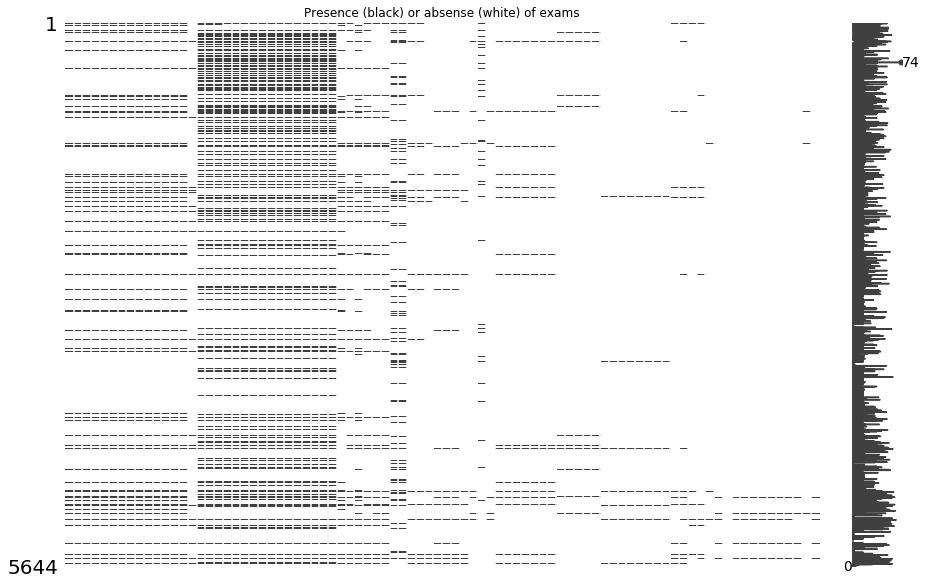

In [14]:
# Nullity Matrix - Presence/Ausence of data
msno.matrix(exams_performed, figsize=(15, 10))
plt.title("Presence (black) or absense (white) of exams");

Through this plot we can see some patterns between some columns (exams). Given this assumption, let's see the missing % for each column and try to find any relation:

In [15]:
missing = calculate_nan_pct(exams_performed)

In [16]:
# How many cols do I have in each missing threshold
missing.drop(['nanValues'], axis=1).groupby(by='nanValuesPct').count()

,index
nanValuesPct,
76.0,16
85.5,2
89.3,12
89.4,2
90.9,1
91.0,1
92.5,1
93.0,1
93.4,2


Given this results, clearly we have a correlation, because the missing % for some columns have the same value (they are unique). Now let's group the exams following some thresholds:
- T1: Less than 80% of missing 
- T2: Between 80 - 90% of missing
- T3: Between 90 - 95% of missing
- T4: Higher than 95%

In [17]:
t1 = list()
t2 = list()
t3 = list()
t4 = list()

for i in range(0, len(missing)):
    if missing.loc[i, 'nanValuesPct'] < 80.0:
        t1.append(missing.loc[i, 'index'])
    elif missing.loc[i, 'nanValuesPct'] >= 80.0 and missing.loc[i, 'nanValuesPct'] < 90.0:
        t2.append(missing.loc[i, 'index'])
    elif missing.loc[i, 'nanValuesPct'] >= 90.0 and missing.loc[i, 'nanValuesPct'] < 95.0:
        t3.append(missing.loc[i, 'index'])
    elif missing.loc[i, 'nanValuesPct'] > 95.0:
        t4.append(missing.loc[i, 'index'])

In [18]:
print('## T1')
print(t1)
print('## T2')
print(t2)
print('## T3')
print(t3)
print('## T4')
print(t4)

## T1
['respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus']
## T2
['hematocrit', 'hemoglobin', 'platelets', 'mean_platelet_volume_', 'red_blood_cells', 'lymphocytes', 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)', 'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_(mch)', 'eosinophils', 'mean_corpuscular_volume_(mcv)', 'monocytes', 'red_blood_cell_distribution_width_(rdw)', 'influenza_b,_rapid_test', 'influenza_a,_rapid_test']
## T3
['neutrophils', 'urea', 'proteina_c_reativa_mg/dl', 'creatinine', 'potassium', 'sodium', 'strepto_a']
## T4
['serum_glucose', 'alanine_transaminase', 'aspartate_transaminase', 'gamma-glutamyltransferase\xa0', 'total_bilirubin', 'direct_bilirubin', 'indirect_bilirubin', 'alkalin

### Evaluate proposed thresholds in a Missing Matrix (ascending order)

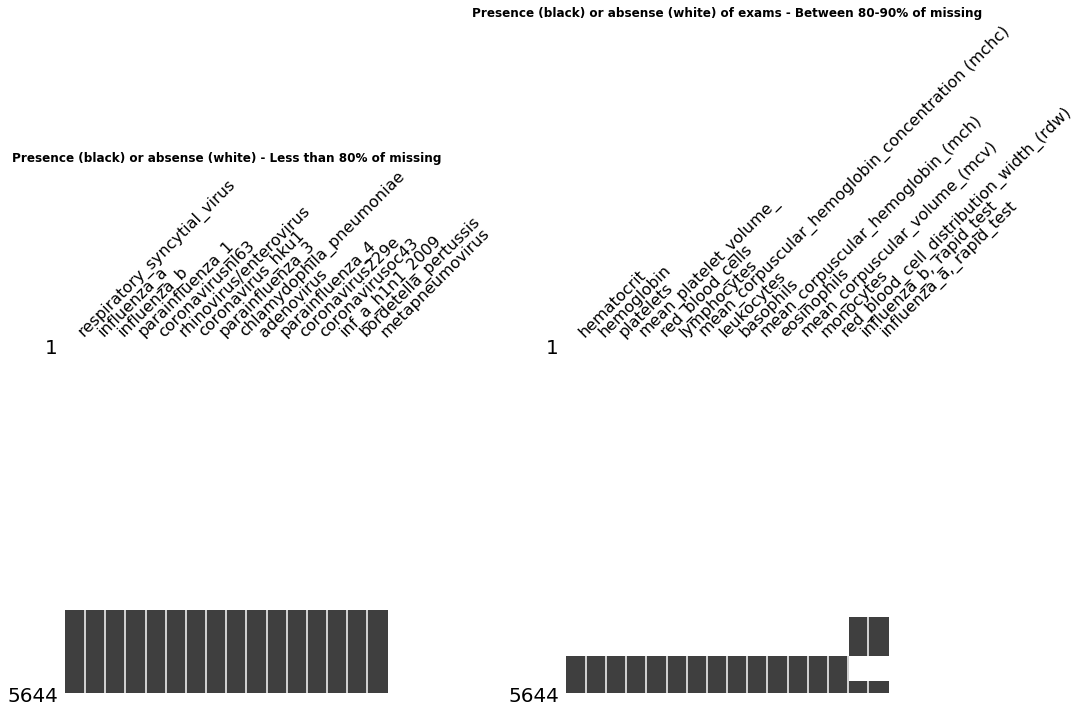

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

# Threshold 1
df_threshold = exams_performed[t1]
msno.matrix(df_threshold, sort='ascending', ax=axes[0], sparkline=False)
axes[0].set_title("Presence (black) or absense (white) - Less than 80% of missing", fontweight="bold");
# Threshold 2
df_threshold = exams_performed[t2]
msno.matrix(df_threshold, sort='ascending', ax=axes[1], sparkline=False)
axes[1].set_title("Presence (black) or absense (white) of exams - Between 80-90% of missing", fontweight="bold");

plt.tight_layout()

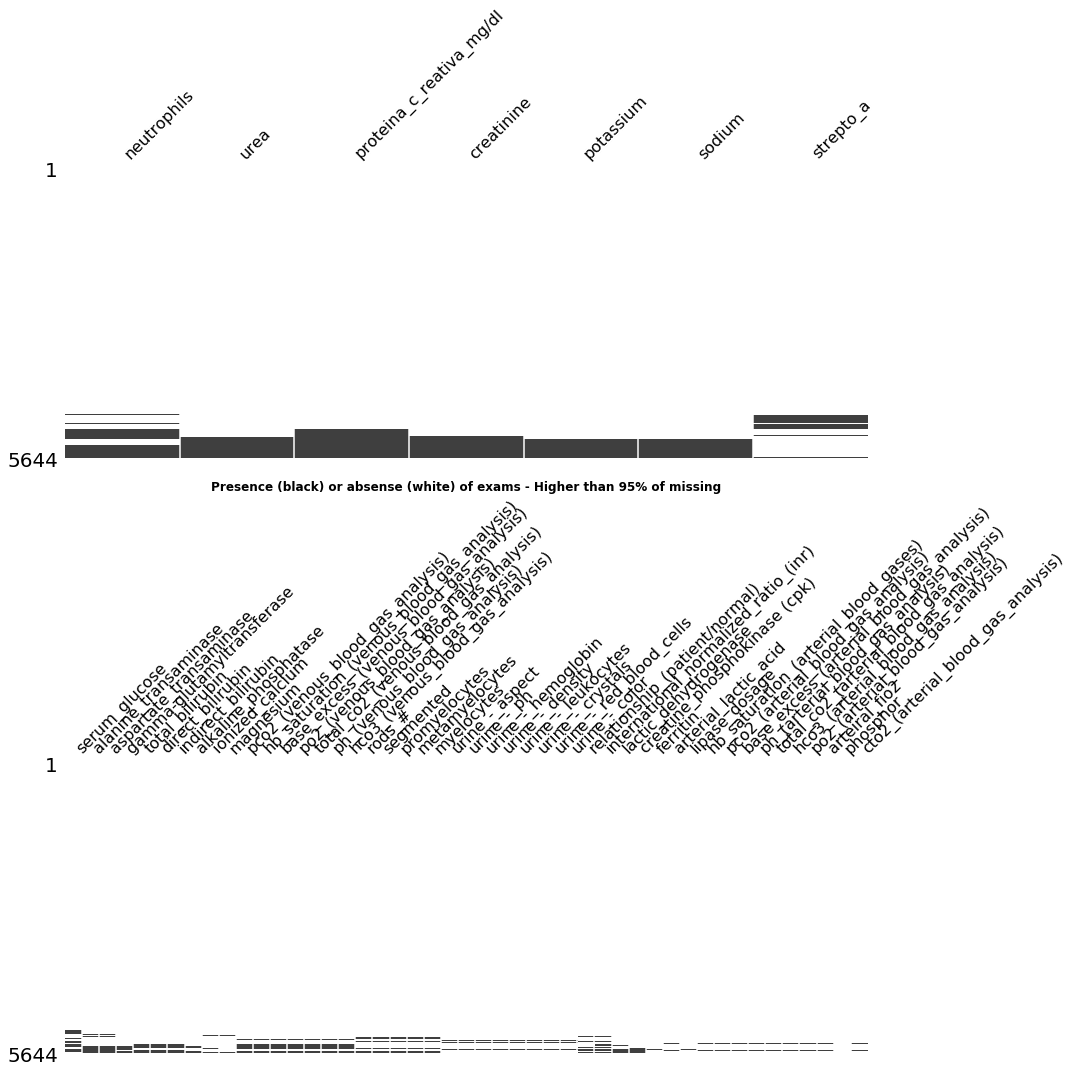

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

# Threshold 3
df_threshold = exams_performed[t3]
msno.matrix(df_threshold, sort='ascending', ax=axes[0], sparkline=False)
axes[1].set_title("Presence (black) or absense (white) of exams - Between 90 - 95% of missing", fontweight="bold");
# Threshold 4
df_threshold = exams_performed[t4]
msno.matrix(df_threshold, sort='ascending', ax=axes[1], sparkline=False)
axes[1].set_title("Presence (black) or absense (white) of exams - Higher than 95% of missing", fontweight="bold");

plt.tight_layout()

Clearly there is a pattern here for all thresholds: your presence happens at the same type, showing a correlation between them (when one is made, the another will occur). Besides that, there is a theoretical reason behind this, for example the first group presents the exams related to **respiratory diseases**, the second related to **blood exams** and the last two are more diverse.

Given my objective (keep the maximum number of complete rows to predict COVID-19) I will remove T4 from my dataset, because:
- Small sample quantity (given the threshold I would have a maximum of 225 rows)
- This group does not show a high correlation of missing values, this indicates that if I want to get complete lines I will probably have a few lines compared to the other groups.

In [21]:
# Remove threshold 4
exams_performed.drop(axis=1, inplace=True, columns=t4)
df.drop(axis=1, inplace=True, columns=t4)

### Evaluate complete rows for given thresholds

In [22]:
# T1
df_complete = exams_performed[t1]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  1352


In [23]:
# T2
df_complete = exams_performed[t2]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  196


In [24]:
# T3
df_complete = exams_performed[t3]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  22


Given the image of missing for threshold 1, this group is more unified. Second threshold present only 196 complete rows given two columns, lets see the second threshold removing those two columns (`rapid_test`):

In [25]:
t2_new = set(t2) - set(['influenza_a,_rapid_test','influenza_b,_rapid_test'])

# T2 NEW
df_complete = exams_performed[t2_new]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  598


Removing those two columns we have more complete rows only with blood exams. Let's see this two columns with T1:

In [26]:
t1_new = t1 + ['influenza_a,_rapid_test','influenza_b,_rapid_test']
# T1 NEW
df_complete = exams_performed[t1_new]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  265


Let's see for the third group without non-uniform missing:

In [27]:
t3_new = set(t3) - set(['neutrophils', 'strepto_a'])
# T1 NEW
df_complete = exams_performed[t3_new]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  292


### Evaluate groups combinations 
Based on previous analysis I will evaluate different groups that maximize the number of rows

In [28]:
g1 = list(t1)
g2 = list(t2_new)
g3 = list(t3_new)

e1 = ['influenza_a,_rapid_test','influenza_b,_rapid_test']
e2 = ['neutrophils', 'strepto_a']

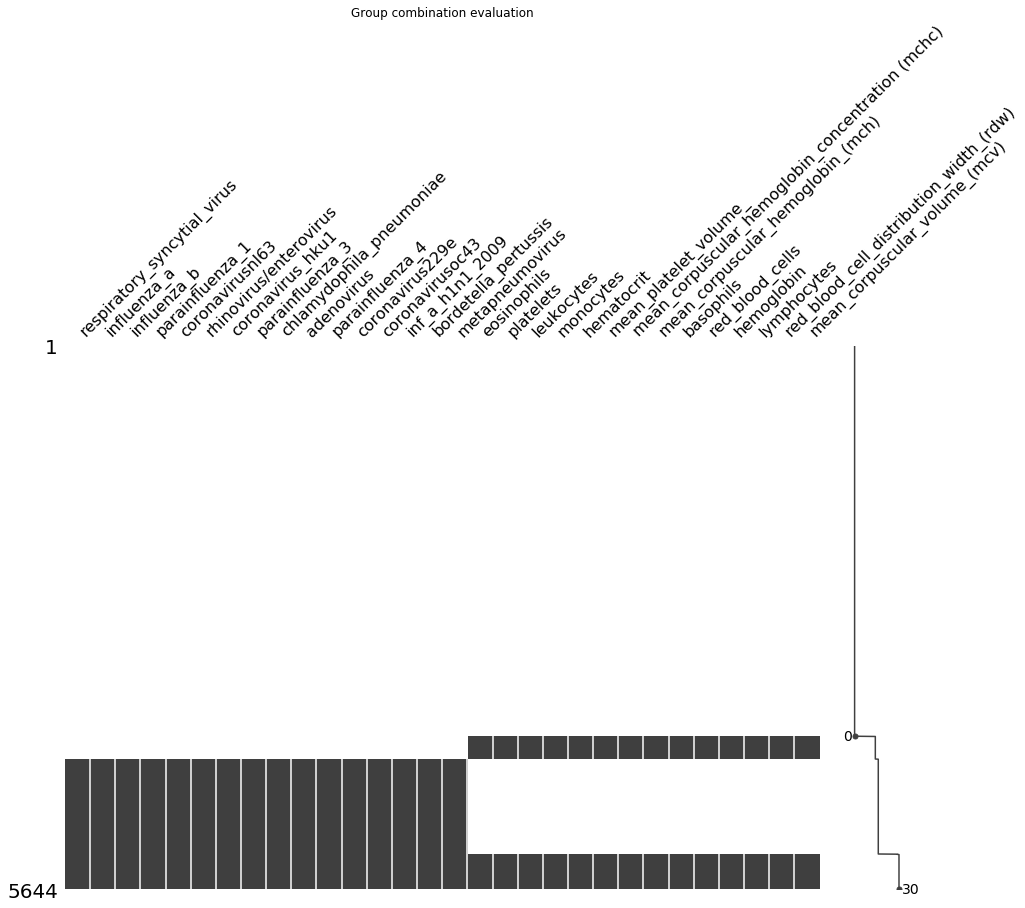

In [29]:
df_threshold = exams_performed[g1 + g2]
msno.matrix(df_threshold, sort='ascending', figsize=(15, 10))
plt.title("Group combination evaluation");

In [30]:
g_comb = g1 + g2
# T1 NEW
df_complete = exams_performed[g_comb]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  362


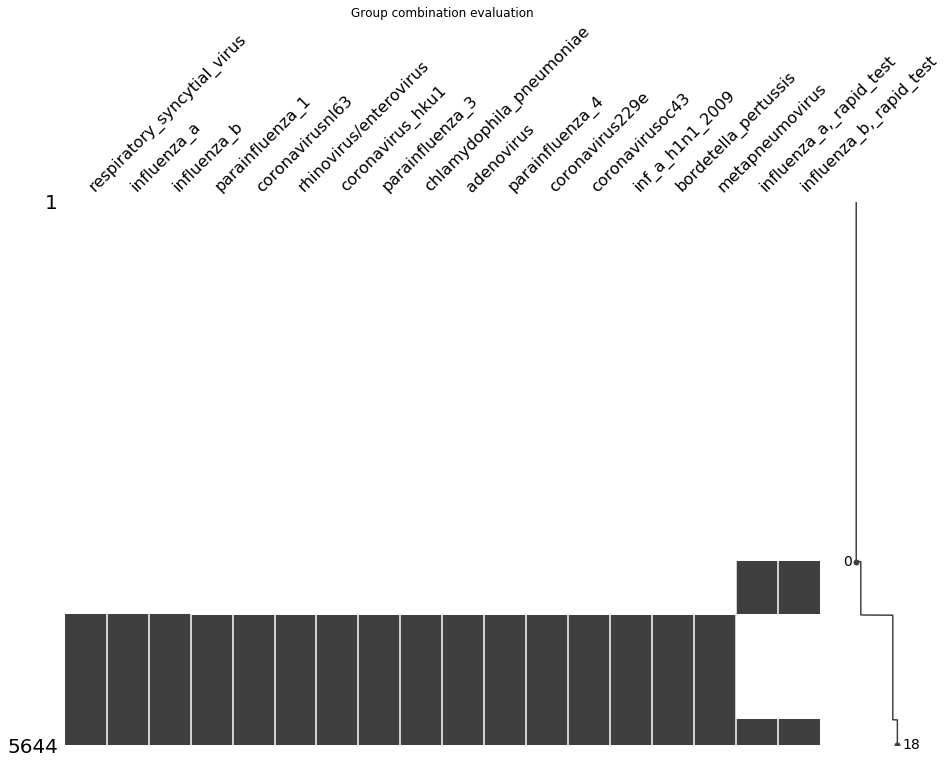

In [31]:
df_threshold = exams_performed[g1 + e1]
msno.matrix(df_threshold, sort='ascending', figsize=(15, 10))
plt.title("Group combination evaluation");

In [32]:
g_comb = g1 + e1
# T1 NEW
df_complete = exams_performed[g_comb]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  265


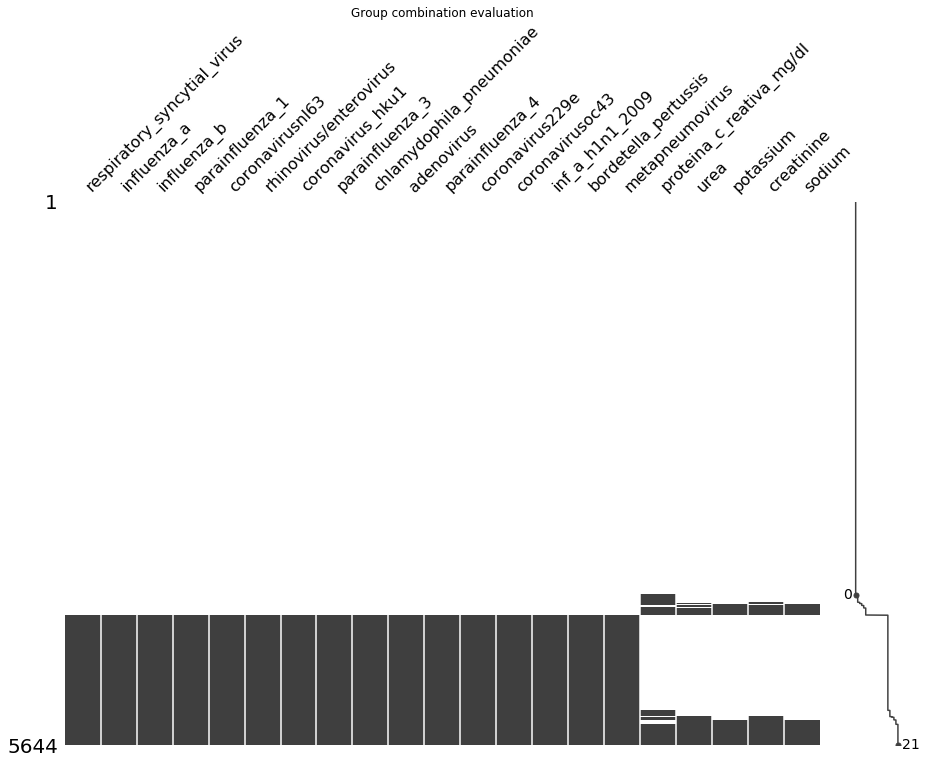

In [33]:
df_threshold = exams_performed[g1 + g3]
msno.matrix(df_threshold, sort='ascending', figsize=(15, 10))
plt.title("Group combination evaluation");

## Conclusions
Given my extense analysis and my goal:  **maximize the number of COMPLETE rows**, I decide to:
- keep the variables of blood exams (g2) as features with age
- others categorical features as respiratory disease (g1) will be kept, but for EDA studies

The others group I will not keep and here are the reasons:
- **(e1)** `['influenza_a,_rapid_test','influenza_b,_rapid_test']`: keeping those variables will cost more than 300 samples rows. Besides that, they are redundant given variables `influenza_a` and `influenza_b` in group 1.
- **(e2)** `['neutrophils', 'strepto_a']`: small sample size
- **(g3)** `['sodium', 'creatinine', 'proteina_c_reativa_mg/dl', 'potassium', 'urea']`: small sample size

This decision is based in my analysis and several works at this same [Kaggle challenge](https://www.kaggle.com/einsteindata4u/covid19/kernels).

The variables that I will keep are **(g1)** and **(g2)**:
- respiratory diseases

`'respiratory_syncytial_virus'
 'influenza_a'
 'influenza_b'
 'parainfluenza_1'
 'coronavirusnl63'
 'rhinovirus/enterovirus'
 'coronavirus_hku1'
 'parainfluenza_3'
 'chlamydophila_pneumoniae'
 'adenovirus'
 'parainfluenza_4'
 'coronavirus229e'
 'coronavirusoc43'
 'inf_a_h1n1_2009'
 'bordetella_pertussis'
 'metapneumovirus']`
 
- blood exams

`'hematocrit',
 'red_blood_cells',
 'basophils',
 'eosinophils',
 'mean_corpuscular_volume_(mcv)',
 'leukocytes',
 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)',
 'platelets',
 'hemoglobin',
 'monocytes',
 'mean_platelet_volume_',
 'lymphocytes',
 'mean_corpuscular_hemoglobin_(mch)',
 'red_blood_cell_distribution_width_(rdw)'`
 
 At the end, I present a dataset compose of those columns with 598 complete rows. To do this is necessary to assume that the **missing values** in respiratory disease variables **implies a not detection (0)**, removing those missings.

## (4) Creating complete dataset

In [34]:
# Variables
others_cols = ['sars-cov-2_exam_result', 'patient_admission', 'patient_age_quantile']
respiratory_diseases = sorted(g1)
blood_exams = sorted(g2)

# Baseline diseases for further evaluation
#baseline_diseases = ['influenza_a', 'influenza_b', 'inf_a_h1n1_2009', 'rhinovirus/enterovirus']

In [35]:
# Fill nan values as not detected (0)
df[respiratory_diseases] = df[respiratory_diseases].fillna(0)

In [36]:
# Dataset A
dataset = df[others_cols + blood_exams + respiratory_diseases].dropna(how='any')
# Reset index
dataset.reset_index(inplace=True)
# Report
print('Dataset have',len(dataset), 'rows.')

Dataset have 598 rows.


# Feature Engineering

Given the fact that our final dataset got some categorical variables related to: **detected or not** a type of virus/bacteria related to a respiratory disease, as:
- respiratory_syncytial_virus
- influenza_a 
- influenza_b
- parainfluenza_1
- coronavirusnl63
- rhinovirus/enterovirus
- coronavirus_hku1
- parainfluenza_3
- chlamydophila_pneumoniae
- adenovirus
- parainfluenza_4
- coronavirus229e
- coronavirusoc43 
- inf_a_h1n1_2009
- bordetella_pertussis
- metapneumovirus

Given the high number of columns, I will collapse all information into one unique binary column: `have_respiratory_disease` where 1 means that the patient have at least one type of respiratory disease, otherwise receives zero. This was done to create a new variable to be used as baseline analysis (explained in the paper).

PS: Besides that, this solve a problem where most of those respiratory columns turns out to be invariant after reducing the dataset to 598 complete rows.

## Feature Engineering in Sets for Dataset

In [37]:
for i in range(0, len(dataset)):
    for j in respiratory_diseases:
        if dataset.loc[i, j] == 1: # I need only one column to say if will be a 1
            dataset.loc[i,'have_respiratory_disease'] = 1
            break
        else:
            dataset.loc[i,'have_respiratory_disease'] = 0

In [38]:
# Change variable type
dataset.have_respiratory_disease = dataset.have_respiratory_disease.astype('uint8')

## Evaluating Feature Engineering (plots)

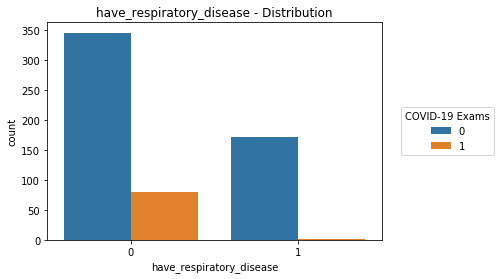

In [39]:
sns.countplot(x='have_respiratory_disease', hue='sars-cov-2_exam_result', data=dataset)
plt.legend(title='COVID-19 Exams', loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.title('have_respiratory_disease - Distribution');

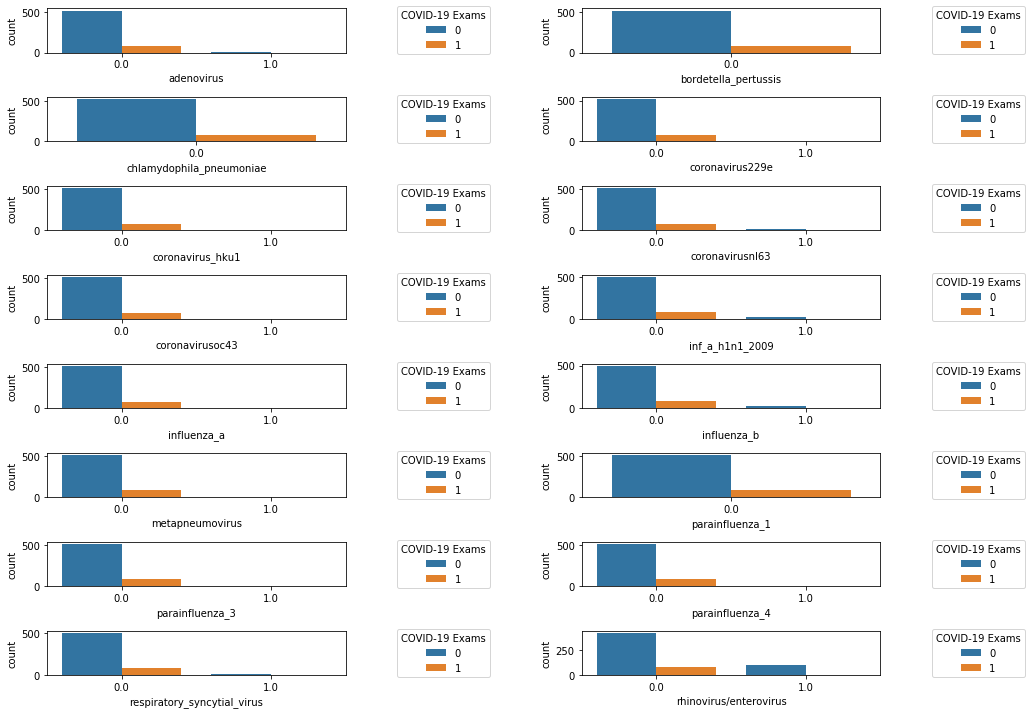

In [40]:
# PLOT - Barplots over our variables
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15,10))
r = 0 # Index row
c = 0 # Index col

for f in respiratory_diseases:
    # Count Plot
    sns.countplot(x=f, hue='sars-cov-2_exam_result', data=dataset, ax=axes[r][c])
    # Plot configs
    axes[r][c].legend(title='COVID-19 Exams', loc='center right', bbox_to_anchor=(1.5, 0.5))
    # Index control
    c += 1
    if c > 1:
        c = 0
        r += 1

plt.tight_layout()

With those graphs it's possible to see that respiratory disease columns, including the created one, can be a separator from negative to positive cases given the fact that they occur more in negative cases.

# Dataset Creation

## Cleaning final dataset - keep only used features for EDA and Model Development

In [41]:
dataset = dataset[others_cols + blood_exams + ['have_respiratory_disease']]

## General info about both datasets

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   sars-cov-2_exam_result                            598 non-null    int64  
 1   patient_admission                                 598 non-null    object 
 2   patient_age_quantile                              598 non-null    int64  
 3   basophils                                         598 non-null    float64
 4   eosinophils                                       598 non-null    float64
 5   hematocrit                                        598 non-null    float64
 6   hemoglobin                                        598 non-null    float64
 7   leukocytes                                        598 non-null    float64
 8   lymphocytes                                       598 non-null    float64
 9   mean_corpuscular_hemo

In [43]:
# COVID-19 Distribution - df_a
dataset['sars-cov-2_exam_result'].value_counts()

0    517
1     81
Name: sars-cov-2_exam_result, dtype: int64

## Exporting Notebook results

In [44]:
dataset.to_csv('results_preProcessing/dataset_processed.csv', sep=',', index=False)